In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.interpolate import interp1d

In [9]:
# Function to read data from JSON files
def read_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data['result']

The data was accessed using the apis provided in the PS. The data received was of "Historical Expires" for both FINNIFTY and BANKNIFTY

In [10]:
banknifty_data = read_json('banknifty_data_1.json')
finnifty_data = read_json('finnifty_data_1.json')

As the dimensions were not matching, some of the data had to be interpolated so as to fit to the target_length

In [11]:
# Function to interpolate data to ensure equal length 
# as the dimensions of the data of both were not matching

def interpolate_data(data, target_length):
    dates = [entry['date'] for entry in data]
    straddle_prices = [float(entry['close']) for entry in data]

    # Interpolate data to match the target length
    f = interp1d(np.arange(len(straddle_prices)), straddle_prices, kind='linear')
    interpolated_prices = f(np.linspace(0, len(straddle_prices) - 1, target_length))

    return interpolated_prices

#### Coorelation is found using pearson correlation coefficient as the data is continuous and assumed to be linearly related

In [12]:
# Function to calculate correlation between two indices
def calculate_correlation(index1_data, index2_data):
    max_length = max(len(index1_data), len(index2_data))

    index1_straddle_prices = interpolate_data(index1_data, max_length)
    index2_straddle_prices = interpolate_data(index2_data, max_length)

    correlation, _ = pearsonr(index1_straddle_prices, index2_straddle_prices)
    return correlation

#### Final Plotting and calculating correlation

Correlation between BANKNIFTY and FINNIFTY: 0.9825333502324598


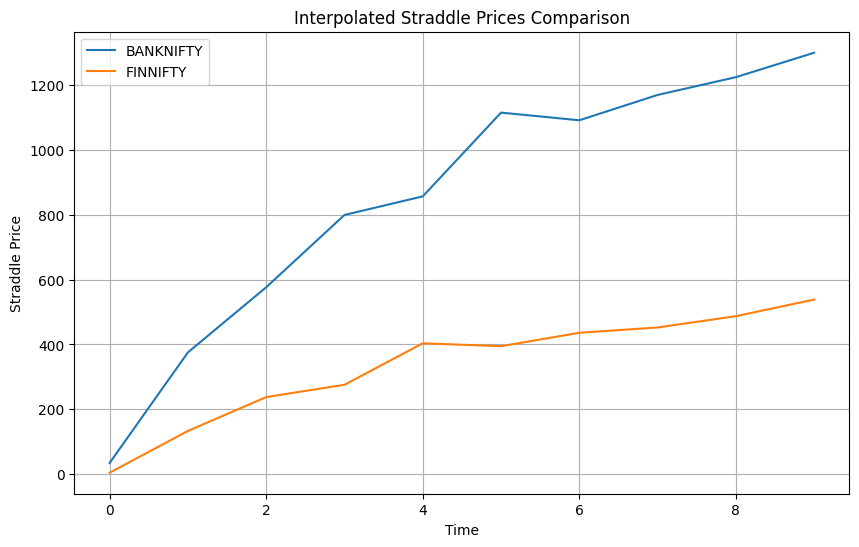

<Figure size 640x480 with 0 Axes>

In [13]:
correlation = calculate_correlation(banknifty_data, finnifty_data)
print("Correlation between BANKNIFTY and FINNIFTY:", correlation)

# Plot straddle prices
plt.figure(figsize=(10, 6))
plt.plot(interpolate_data(banknifty_data, len(finnifty_data)), label='BANKNIFTY')
plt.plot(interpolate_data(finnifty_data, len(banknifty_data)), label='FINNIFTY')
plt.title('Interpolated Straddle Prices Comparison')
plt.xlabel('Time')
plt.ylabel('Straddle Price')
plt.legend()
plt.grid(True)
plt.show()

As can be seen (correlation > 0.95), the data is seen to be coorelated in these two BANKNIFTY and FINNIFTY pairs.

Using this pattern, some values/predictoins for the other one of the pair can be done easily to gain certain advantages.

The reason how and why these are coorealated is because the straddle prices are dependent on the volatility of the market. And one of these factors is indicative of the other. 


Due to the difference in the time of expiry in them, it can be seen that the correlation is not perfect due to normal noise.

To detect spikes in the data, the metrics such as high increase in average over certain time intervals, or calculating differential thresholds over specific intervals and detecting the sudden increase in it. All this needs extensive **continuous** data. 

Given that, the trends in one can be detected as is kindof representative (by trend) of other as seen above.